# 4. Topic modelling

This notebook will introduce you to the basics of topic modelling. 
You'll learn how identify topics in documents using the tf-idf matrix and ML classifier.







Legend of symbols:

- 🤓: Tips

- 🤖📝: Your turn

- ❓: Question

- 💫: Extra exercise 

## 3.1. Tf-idf matrix + ML classifier

In this section, we'll learn how to do topic modelling based on bag of words and ML classification.

### 3.1.1. Build tf-idf matrix

First, let's import the news dataset:

In [1]:
import pandas as pd

df = pd.read_csv('../data/news.csv')

In [2]:
len(df)

1634

In [3]:
df.head()

,topic,media,corpus,headline,link
0,climatic,The Guardian,The reindeer is the emblematic Christmas anima...,Weatherwatch: reindeer adapted to snow but not...,https://www.theguardian.com/world/2019/dec/23/...
1,climatic,The Guardian,The European parliament is split over whether ...,European parliament split on declaring climate...,https://www.theguardian.com/world/2019/nov/26/...
2,climatic,The Guardian,Fisayo Soyombo was eating an evening snack in ...,‘Climate of fear’: Nigeria intensifies crackdo...,https://www.theguardian.com/world/2019/nov/14/...
3,climatic,The Guardian,The European Union considers itself as a leade...,EU's soaring climate rhetoric not always match...,https://www.theguardian.com/world/2019/dec/11/...
4,climatic,The Guardian,"Good morning, we’re now exactly two weeks out ...",Thursday briefing: Political climate too hot f...,https://www.theguardian.com/world/2019/nov/28/...


In [11]:
df.index

RangeIndex(start=0, stop=1634, step=1)

In [6]:
import re
re.sub('a', 'b', 'aaaaaaaaaaaaaaaaaaaabapsppspspspsps')

'bbbbbbbbbbbbbbbbbbbbbbpsppspspspsps'

To begin with, we need to build a **tf-idf matrix** with the corpus. Let's start with cleaning the text:

In [7]:
# We are going to start with applying a first round of data cleaning (square brackets, lower case)  
import re
import string

def clean_text(text):
    """
    This function
    makes text lowercase, 
    remove text in square brackets, 
    remove punctuation and 
    remove words containing numbers.
    """
    text = str(text).lower() # make text lower case
    text = re.sub('\[.*?\]', '', str(text)) # remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', str(text)) # remove punctuation
    text = re.sub('\w*\d\w*', '', str(text)) # remove words containing numbers.
    return text

df['corpus_clean'] = df['corpus'].apply(clean_text)

In [8]:
df['corpus_clean'].head()

0    the reindeer is the emblematic christmas anima...
1    the european parliament is split over whether ...
2    fisayo soyombo was eating an evening snack in ...
3    the european union considers itself as a leade...
4    good morning we’re now exactly two weeks out f...
Name: corpus_clean, dtype: object

Now the text is cleaned, we're ready to build the tf-idf matrix:

In [10]:
# We are going to create a document-term matrix using TfidfVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features = 200, stop_words='english')
data_cv = vec.fit_transform(df.corpus_clean)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=vec.get_feature_names())
data_dtm.index = df.index
data_dtm.head()


,abuse,according,action,africa,african,aid,american,army,article,attack,...,white,woman,women,work,workers,working,world,year,years,young
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.176560,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.053168,0.051550,0.039165
2,0.000000,0.083860,0.000000,0.0,0.0,0.0,0.0,0.109019,0.092743,0.000000,...,0.000000,0.000000,0.00000,0.078041,0.0,0.000000,0.000000,0.061938,0.060053,0.000000
3,0.000000,0.000000,0.111860,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.084885,0.0,0.000000,0.075622,0.000000,0.000000,0.000000
4,0.054005,0.041947,0.102885,0.0,0.0,0.0,0.0,0.054533,0.000000,0.058097,...,0.059158,0.056128,0.04439,0.039037,0.0,0.045472,0.069555,0.061964,0.030039,0.000000


🤓 As you might realised, there exists words (columns) that express the same idea: (woman, women), (work, workers, working). So, we need to use lemmatization or stemming. 

In [12]:
import spacy
nlp = spacy.load('en_core_web_sm')
from nltk import SnowballStemmer
stemmer = SnowballStemmer('english')

def stemming(new):
    """
    This function reduces 
    words to stems.
    """
    tokens = [[token.text for token in sentence] for sentence in nlp(new).sents]
    stems = [[stemmer.stem(token) for token in sentence] for sentence in tokens]
    stems = " ".join(str(token) for token in stems)
    return stems



df['corpus_stem'] = df['corpus_clean'].apply(stemming)

In [13]:
stemming('Sentence about AI, cats and dogs.')

"['sentenc', 'about', 'ai', ',', 'cat', 'and', 'dog', '.']"

In [14]:
df['corpus_stem'].head()

0    ['the', 'reindeer', 'is', 'the', 'emblemat', '...
1    ['the', 'european', 'parliament', 'is', 'split...
2    ['fisayo', 'soyombo', 'was', 'eat', 'an', 'eve...
3    ['the', 'european', 'union', 'consid', 'itself...
4    ['good', 'morn', 'we', 're', 'now', 'exact', '...
Name: corpus_stem, dtype: object

Now, let's compute the tf-idf matrix again:

In [15]:
vec = TfidfVectorizer(max_features = 200, stop_words='english')
data_cv = vec.fit_transform(df.corpus_stem)
data_dtm_stem = pd.DataFrame(data_cv.toarray(), columns=vec.get_feature_names())
data_dtm_stem.index = df.index
data_dtm_stem.head()

,abus,accord,act,action,ad,age,aid,alleg,allow,american,...,water,way,week,white,women,work,worker,world,year,young
0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.193254,0.0,...,0.237402,0.164827,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.039308,0.046054,0.183301,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.036177,0.000000,0.000000,0.000000,0.0,0.000000,0.095086,0.044087
2,0.000000,0.080336,0.000000,0.000000,0.0,0.00000,0.0,0.302241,0.000000,0.0,...,0.000000,0.000000,0.073936,0.000000,0.000000,0.063040,0.0,0.000000,0.097165,0.000000
3,0.000000,0.000000,0.000000,0.112173,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.091869,0.000000,0.000000,0.000000,0.075504,0.0,0.082063,0.000000,0.000000
4,0.091975,0.038702,0.000000,0.090236,0.0,0.04806,0.0,0.048535,0.000000,0.0,...,0.000000,0.000000,0.071237,0.056073,0.042253,0.060739,0.0,0.066015,0.070214,0.000000


Now, we will add the topic of each document by adding the topic column to **<tt> data_dtm_stem <tt>**.

In [16]:
df_ml = pd.concat([data_dtm_stem.reset_index(drop=True), df.topic.reset_index(drop=True)], axis=1)
df_ml.head()

,abus,accord,act,action,ad,age,aid,alleg,allow,american,...,way,week,white,women,work,worker,world,year,young,topic
0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.193254,0.0,...,0.164827,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,climatic
1,0.000000,0.039308,0.046054,0.183301,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.036177,0.000000,0.000000,0.000000,0.0,0.000000,0.095086,0.044087,climatic
2,0.000000,0.080336,0.000000,0.000000,0.0,0.00000,0.0,0.302241,0.000000,0.0,...,0.000000,0.073936,0.000000,0.000000,0.063040,0.0,0.000000,0.097165,0.000000,climatic
3,0.000000,0.000000,0.000000,0.112173,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.091869,0.000000,0.000000,0.000000,0.075504,0.0,0.082063,0.000000,0.000000,climatic
4,0.091975,0.038702,0.000000,0.090236,0.0,0.04806,0.0,0.048535,0.000000,0.0,...,0.000000,0.071237,0.056073,0.042253,0.060739,0.0,0.066015,0.070214,0.000000,climatic


### 🤖📝 **Your turn**

Build a **<tt> data_dtm_lem <tt>** using lemmatization. Is there any difference?

In [19]:
import spacy
nlp = spacy.load('en_core_web_sm')
from nltk import SnowballStemmer
stemmer = SnowballStemmer('english')

def lemmatizing(new):
    """
    This function reduces 
    words to lemmas.
    """
    tokens = [[token.lemma_ for token in sentence] for sentence in nlp(new).sents]
    lemms = " ".join(str(token) for token in tokens)
    return lemms


df['corpus_lem'] = df['corpus_clean'].apply(lemmatizing)

In [20]:
df['corpus_lem'].head()

0    ['the', 'reindeer', 'be', 'the', 'emblematic',...
1    ['the', 'european', 'parliament', 'be', 'split...
2    ['fisayo', 'soyombo', 'be', 'eat', 'an', 'even...
3    ['the', 'european', 'union', 'consider', '-PRO...
4    ['good', 'morning', '-PRON-', 'be', 'now', 'ex...
Name: corpus_lem, dtype: object

In [28]:
# Creating a a new tfidf matrix with lemmatizers
vec = TfidfVectorizer(max_features = 200, stop_words='english')
data_cv = vec.fit_transform(df.corpus_lem)
data_dtm_lem = pd.DataFrame(data_cv.toarray(), columns=vec.get_feature_names())
data_dtm_lem.index = df.index
data_dtm_lem.head()

# Add the topic column
df_ml_2 = pd.concat([data_dtm_stem.reset_index(drop=True), df.topic.reset_index(drop=True)], axis=1)
df_ml_2.head()

,abus,accord,act,action,ad,age,aid,alleg,allow,american,...,way,week,white,women,work,worker,world,year,young,topic
0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.193254,0.0,...,0.164827,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,climatic
1,0.000000,0.039308,0.046054,0.183301,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.036177,0.000000,0.000000,0.000000,0.0,0.000000,0.095086,0.044087,climatic
2,0.000000,0.080336,0.000000,0.000000,0.0,0.00000,0.0,0.302241,0.000000,0.0,...,0.000000,0.073936,0.000000,0.000000,0.063040,0.0,0.000000,0.097165,0.000000,climatic
3,0.000000,0.000000,0.000000,0.112173,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.091869,0.000000,0.000000,0.000000,0.075504,0.0,0.082063,0.000000,0.000000,climatic
4,0.091975,0.038702,0.000000,0.090236,0.0,0.04806,0.0,0.048535,0.000000,0.0,...,0.000000,0.071237,0.056073,0.042253,0.060739,0.0,0.066015,0.070214,0.000000,climatic


In [26]:
pd.options.display.max_seq_items = 200
data_dtm_lem.columns

Index(['abuse', 'accord', 'act', 'action', 'add', 'age', 'aid', 'allow',
       'area', 'army', 'article', 'ask', 'attack', 'australia', 'authority',
       'away', 'begin', 'believe', 'big', 'black', 'border', 'bring',
       'britain', 'british', 'camp', 'campaign', 'case', 'cause', 'centre',
       'change', 'child', 'church', 'city', 'claim', 'climate', 'come',
       'community', 'company', 'conflict', 'continue', 'control', 'country',
       'court', 'crime', 'day', 'deal', 'death', 'die', 'end', 'europe',
       'face', 'family', 'far', 'feel', 'fight', 'follow', 'food', 'force',
       'foreign', 'girl', 'global', 'good', 'government', 'great', 'group',
       'grow', 'guardian', 'happen', 'head', 'health', 'help', 'high',
       'history', 'hold', 'home', 'hope', 'house', 'human', 'include',
       'increase', 'international', 'issue', 'just', 'kill', 'know', 'labour',
       'large', 'later', 'law', 'lead', 'leader', 'leave', 'life', 'like',
       'little', 'live', 'local', 

In [27]:
data_dtm_stem.columns

Index(['abus', 'accord', 'act', 'action', 'ad', 'age', 'aid', 'alleg', 'allow',
       'american', 'ani', 'anoth', 'area', 'arm', 'armi', 'articl', 'ask',
       'attack', 'australia', 'author', 'away', 'becaus', 'becom', 'befor',
       'believ', 'black', 'border', 'british', 'came', 'camp', 'campaign',
       'case', 'centr', 'chang', 'child', 'children', 'church', 'citi',
       'claim', 'climat', 'come', 'communiti', 'compani', 'continu', 'countri',
       'court', 'crime', 'day', 'death', 'describ', 'develop', 'did', 'die',
       'doe', 'dure', 'end', 'everi', 'exploit', 'face', 'famili', 'far',
       'fight', 'follow', 'food', 'forc', 'foreign', 'girl', 'global',
       'govern', 'group', 'guardian', 'hand', 'happen', 'head', 'health',
       'help', 'high', 'home', 'hope', 'hous', 'human', 'includ', 'increas',
       'intern', 'investig', 'issu', 'just', 'kill', 'know', 'labour', 'law',
       'leader', 'leav', 'left', 'life', 'like', 'live', 'local', 'long',
       'look', 'm

### 3.1.2. Build machine learning classifier

Now, we are ready to classify a ML algorithm to **detect** which new corresponds to climatic change on the dataset.

To do so, we're going to apply a *decision tree* classifier.

🌍 https://scikit-learn.org/stable/modules/tree.html

🌍 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

First, we'll create a dummy variable that shows which new correponds to climatic topic:

In [38]:
df_ml['topic_climatic_dummy'] = 0

df_ml.loc[df['topic'] == 'climatic', 'topic_climatic_dummy'] = 1

In [39]:
df_ml.head()

,abus,accord,act,action,ad,age,aid,alleg,allow,american,...,way,week,white,women,work,worker,world,year,young,topic_climatic_dummy
0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.193254,0.0,...,0.164827,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1
1,0.000000,0.039308,0.046054,0.183301,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.036177,0.000000,0.000000,0.000000,0.0,0.000000,0.095086,0.044087,1
2,0.000000,0.080336,0.000000,0.000000,0.0,0.00000,0.0,0.302241,0.000000,0.0,...,0.000000,0.073936,0.000000,0.000000,0.063040,0.0,0.000000,0.097165,0.000000,1
3,0.000000,0.000000,0.000000,0.112173,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.091869,0.000000,0.000000,0.000000,0.075504,0.0,0.082063,0.000000,0.000000,1
4,0.091975,0.038702,0.000000,0.090236,0.0,0.04806,0.0,0.048535,0.000000,0.0,...,0.000000,0.071237,0.056073,0.042253,0.060739,0.0,0.066015,0.070214,0.000000,1


In [40]:
df_ml.tail()

,abus,accord,act,action,ad,age,aid,alleg,allow,american,...,way,week,white,women,work,worker,world,year,young,topic_climatic_dummy
1629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1630,0.000000,0.024749,0.000000,0.043278,0.000000,0.046100,0.0,0.000000,0.000000,0.017903,...,0.141777,0.000000,0.161357,0.675497,0.155364,0.015467,0.073876,0.014967,0.041636,0
1631,0.000000,0.009333,0.010935,0.021761,0.000000,0.000000,0.0,0.011705,0.010448,0.135036,...,0.017822,0.017180,0.554426,0.040759,0.058591,0.104996,0.015920,0.056443,0.062807,0
1632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1633,0.031122,0.026191,0.015343,0.000000,0.014813,0.016262,0.0,0.065691,0.014660,0.094735,...,0.087524,0.036157,0.056921,0.014297,0.082210,0.000000,0.078182,0.079195,0.014688,0


In [41]:
df_ml = df_ml.drop(['topic'], axis=1)

KeyError: "['topic'] not found in axis"

In [35]:
df_ml.head()

,abus,accord,act,action,ad,age,aid,alleg,allow,american,...,way,week,white,women,work,worker,world,year,young,topic_climatic_dummy
0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.193254,0.0,...,0.164827,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1
1,0.000000,0.039308,0.046054,0.183301,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.036177,0.000000,0.000000,0.000000,0.0,0.000000,0.095086,0.044087,1
2,0.000000,0.080336,0.000000,0.000000,0.0,0.00000,0.0,0.302241,0.000000,0.0,...,0.000000,0.073936,0.000000,0.000000,0.063040,0.0,0.000000,0.097165,0.000000,1
3,0.000000,0.000000,0.000000,0.112173,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.091869,0.000000,0.000000,0.000000,0.075504,0.0,0.082063,0.000000,0.000000,1
4,0.091975,0.038702,0.000000,0.090236,0.0,0.04806,0.0,0.048535,0.000000,0.0,...,0.000000,0.071237,0.056073,0.042253,0.060739,0.0,0.066015,0.070214,0.000000,1


We will split the dataset into training and testing.  **<tt> Sklearn <tt>** has already a function thas does it:

In [42]:
from sklearn.model_selection import train_test_split

df_train, df_test, topic_train, topic_test = train_test_split(df_ml.iloc[:,:-1], df_ml.iloc[:,-1], test_size=0.33, random_state=42)

And now, let's train our classifier with our training data:

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, random_state=15)
dt = dt.fit(df_train, topic_train)

Finally, we test the performance of the classifier with our testing data:

In [48]:
from sklearn.metrics import accuracy_score

topic_pred = dt.predict(df_test)
score = accuracy_score(topic_test, topic_pred)

score

0.975925925925926

Oh wow! Our decision tree correclty classifies 97.59% of news

Let's inspect the tree:

🌍 https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [53]:
from sklearn import tree
!pip install graphviz
import graphviz 

dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(dt, out_file=None, 
                      feature_names=df_train.columns,    
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

You should consider upgrading via the '/home/avaldivia/env37/bin/python3.7 -m pip install --upgrade pip' command.


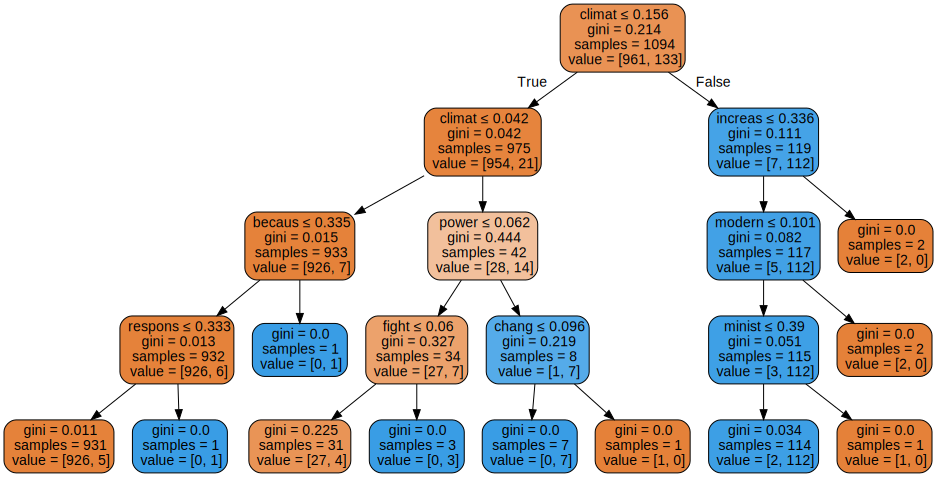

In [54]:
graph

### 🤖📝 **Your turn**

Build a classifier to classify *child _soldiers*.

In [ ]:
df_ml['topic_child_soldiers_dummy'] = 0

df_ml.loc[df['topic'] == 'child soldiers', 'topic_child_soldiers_dummy'] = 1